### End 2 End NLP Project (Walk Through)

+ Emotion Detection In Text
+ Text Classifier

In [82]:
# Load EDA packages
import pandas as pd
import numpy as np

In [83]:
# Load Data Viz Packages
import seaborn as sns

In [84]:
# Load Text Cleaning Packages
import neattext.functions as nfx

In [85]:
# Load ML packages
# Estimators

from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [86]:
# Load Dataset
df = pd.read_csv("../data/emotion_dataset_2.csv")

In [87]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [88]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

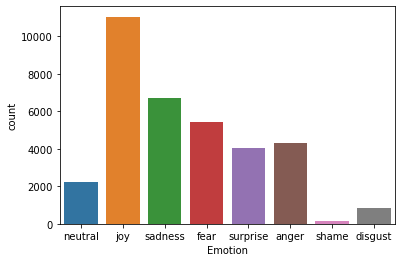

In [89]:
# Plot
sns.countplot(x='Emotion', data=df)

In [90]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [91]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [92]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_shortwords)

In [93]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,HOMEGIRL BABY FUNERAL HATE FUNERALS THIS REALL...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such true hazel brilliant Regular features ope...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,babe hugggzzz babe naamazed babe despite nega ...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,have gift Hope like hand made wear keep warm
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt give world MOST DEFINITELY take away
34789,34789,anger,A man robbed me today .,robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call JEALOUSY call Losing


In [94]:
# Features & Labels
X = df['Clean_Text']
y = df['Emotion']

In [95]:
# Split Data into training and others
X_train, X_else, y_train, y_else = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
# Split Data from else into validation set and test set
X_val, X_test, y_val, y_test = train_test_split(X_else, y_else, test_size=0.5, random_state=42)

### Compare 3 Algorithms' Performance:
1. Logistic Regression
2. SVM
3. Random Forest

In [97]:
# Ignore warnings 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [98]:
# Print the results of cross val
def print_results(results):
    print(f"Best Parameters: {results.best_params_}\n")
    
    means = results.cv_results_["mean_test_score"]
    stds = results.cv_results_["std_test_score"]
    params = results.cv_results_["params"]
    for mean, std, param in zip(means, stds, params):
        print(f"{mean:.3f} (+/-{std*2:.3f}) for {param}")


In [99]:
from sklearn.model_selection import GridSearchCV

#### Logistic Regression

In [100]:
# Import LR packages
from sklearn.linear_model import LogisticRegression

In [101]:
# 5 Fold Cross Validation
lr = LogisticRegression()
params = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
cv_lr = GridSearchCV(lr, params, cv=5)

In [102]:
# Build Pipeline for Cross Val
from sklearn.pipeline import Pipeline
pipe_cv_lr = Pipeline(steps=[("cnt_vec", CountVectorizer()), ('cv_lr', cv_lr)])

In [103]:
# Train and Fit data
pipe_cv_lr.fit(X_train, y_train)

/Users/jeffreykktu_updated/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jeffreykktu_updated/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

/Users/jeffreykktu_updated/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jeffreykktu_updated/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('cv_lr',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                1000]}))])

In [104]:
# Check the paramaters 
print_results(cv_lr)

Best Parameters: {'C': 1}

0.331 (+/-0.002) for {'C': 0.001}
0.440 (+/-0.005) for {'C': 0.01}
0.565 (+/-0.017) for {'C': 0.1}
0.605 (+/-0.011) for {'C': 1}
0.585 (+/-0.007) for {'C': 10}
0.574 (+/-0.007) for {'C': 100}
0.564 (+/-0.006) for {'C': 1000}


In [105]:
# Print the best estimator
cv_lr.best_estimator_

LogisticRegression(C=1)

In [106]:
pipe_lr_best = Pipeline(steps=[("cnt_vec", CountVectorizer()), ("best_lr", cv_lr.best_estimator_)])

#### SVM

In [74]:
from sklearn.svm import SVC

In [75]:
# 5 Fold Cross Validation
svc = SVC()
params = {
    "kernel": ["linear"],
    "C": [0.1, 1, 10]
}

cv_svc = GridSearchCV(svc, params, cv=5)

In [76]:
pipe_cv_svc = Pipeline(steps=[("cnt_vec", CountVectorizer()), ("cv_svc", cv_svc)])

In [77]:
# Fit data
pipe_cv_svc.fit(X_train, y_train)

Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('cv_svc',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'kernel': ['linear']}))])

In [78]:
# Print params
print_results(cv_svc)

Best Parameters: {'C': 1, 'kernel': 'linear'}

0.562 (+/-0.015) for {'C': 0.1, 'kernel': 'linear'}
0.579 (+/-0.009) for {'C': 1, 'kernel': 'linear'}
0.543 (+/-0.008) for {'C': 10, 'kernel': 'linear'}


In [79]:
# print the best estimator
cv_svc.best_estimator_

SVC(C=1, kernel='linear')

In [80]:
# Output the best param pipeline
pipe_svc_best = Pipeline(steps=[("cnt_vec", CountVectorizer()), ("best_svc", cv_svc.best_estimator_)])

#### Random Forest

In [67]:
# Import random forest
from sklearn.ensemble import RandomForestClassifier

In [68]:
# 5 Fold Cross Validation
rf = RandomForestClassifier()
params = {
    "n_estimators": [5, 50, 250],
    "max_depth": [2, 4, 6, 8, 16]
}
cv_rf = GridSearchCV(rf, params, cv=5)

In [69]:
pipe_cv_rf = Pipeline(steps=[("cnt_vec", CountVectorizer()), ("cv_rf", cv_rf)])

In [70]:
# Train the data
pipe_cv_rf.fit(X_train, y_train)

Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('cv_rf',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [2, 4, 6, 8, 16],
                                          'n_estimators': [5, 50, 250]}))])

In [71]:
# Show the params
print_results(cv_rf)

Best Parameters: {'max_depth': 16, 'n_estimators': 5}

0.326 (+/-0.007) for {'max_depth': 2, 'n_estimators': 5}
0.318 (+/-0.000) for {'max_depth': 2, 'n_estimators': 50}
0.318 (+/-0.000) for {'max_depth': 2, 'n_estimators': 250}
0.342 (+/-0.008) for {'max_depth': 4, 'n_estimators': 5}
0.318 (+/-0.000) for {'max_depth': 4, 'n_estimators': 50}
0.318 (+/-0.000) for {'max_depth': 4, 'n_estimators': 250}
0.342 (+/-0.022) for {'max_depth': 6, 'n_estimators': 5}
0.322 (+/-0.008) for {'max_depth': 6, 'n_estimators': 50}
0.318 (+/-0.003) for {'max_depth': 6, 'n_estimators': 250}
0.345 (+/-0.018) for {'max_depth': 8, 'n_estimators': 5}
0.329 (+/-0.003) for {'max_depth': 8, 'n_estimators': 50}
0.328 (+/-0.002) for {'max_depth': 8, 'n_estimators': 250}
0.381 (+/-0.026) for {'max_depth': 16, 'n_estimators': 5}
0.346 (+/-0.006) for {'max_depth': 16, 'n_estimators': 50}
0.339 (+/-0.002) for {'max_depth': 16, 'n_estimators': 250}


In [72]:
# print the best estimator
cv_rf.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=5)

In [73]:
# Output the best param pipeline
pipe_rf_best = Pipeline(steps=[("cnt_vec", CountVectorizer()), ("cv_rf", cv_rf.best_estimator_)])

### Using Validation set to choose the best algorithm

In [109]:
# LR
pipe_lr_best.fit(X_train, y_train)

/Users/jeffreykktu_updated/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('best_lr', LogisticRegression(C=1))])

In [111]:
# SVC
pipe_svc_best.fit(X_train, y_train)

Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('best_svc', SVC(C=1, kernel='linear'))])

In [113]:
# RF
pipe_rf_best.fit(X_train, y_train)

Pipeline(steps=[('cnt_vec', CountVectorizer()),
                ('cv_rf',
                 RandomForestClassifier(max_depth=16, n_estimators=5))])

In [117]:
# Compare the accuracy with validation set
model_dict = {"lr": pipe_lr_best, "svc": pipe_svc_best, "rf": pipe_rf_best}
for model in model_dict:
    model_score = model_dict[model].score(X_val, y_val)
    print(f"{model}: {model_score}")

lr: 0.6127610653381874
svc: 0.5966660279747078
rf: 0.39164590917800346


#### Conclusion: Comparing the 3 algorithms, Logistic Regression performed the best

In [118]:
# Check accuracy with Test Set
pipe_lr_best.score(X_test, y_test)

0.6106533818739222

In [122]:
# Make a Prediction
ex1 = "This song is exciting."
ex2 = 'This song is pretty sad.'

In [123]:
pipe_lr_best.predict([ex1])

array(['joy'], dtype=object)

In [124]:
pipe_lr_best.predict([ex2])

array(['surprise'], dtype=object)

In [125]:
# Prediction Probability
pipe_lr_best.predict_proba([ex1])

array([[0.08895069, 0.01075775, 0.07631039, 0.4109189 , 0.12741872,
        0.14847766, 0.00150815, 0.13565774]])

In [126]:
pipe_lr_best.predict_proba([ex2])

array([[0.15608567, 0.02546254, 0.02979869, 0.17164699, 0.07857619,
        0.21697633, 0.0014479 , 0.32000569]])

In [127]:
# To know the classes
pipe_lr_best.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [128]:
# Save Model and Pipeline
import joblib

In [129]:
with open("20210722_emotion_classifier_pipe_lr_best.pkl", "wb") as pipeline_file:
    joblib.dump(pipe_lr_best, pipeline_file)